In [139]:
from DatasetGenerator import *
from helpers import *
from markov_algos import *
from plots import *

from time import time

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Evolution of the Markov chain during the simulated annealing process (Q2.a)

### for G1

[step 1/7] Time spent on beta = 1.000 : 5.556 sec
[step 2/7] Time spent on beta = 4.642 : 6.036 sec
[step 3/7] Time spent on beta = 21.544 : 5.477 sec
[step 4/7] Time spent on beta = 100.000 : 5.220 sec
[step 5/7] Time spent on beta = 464.159 : 6.300 sec
[step 6/7] Time spent on beta = 2154.435 : 5.891 sec
[step 7/7] Time spent on beta = 10000.000 : 6.629 sec


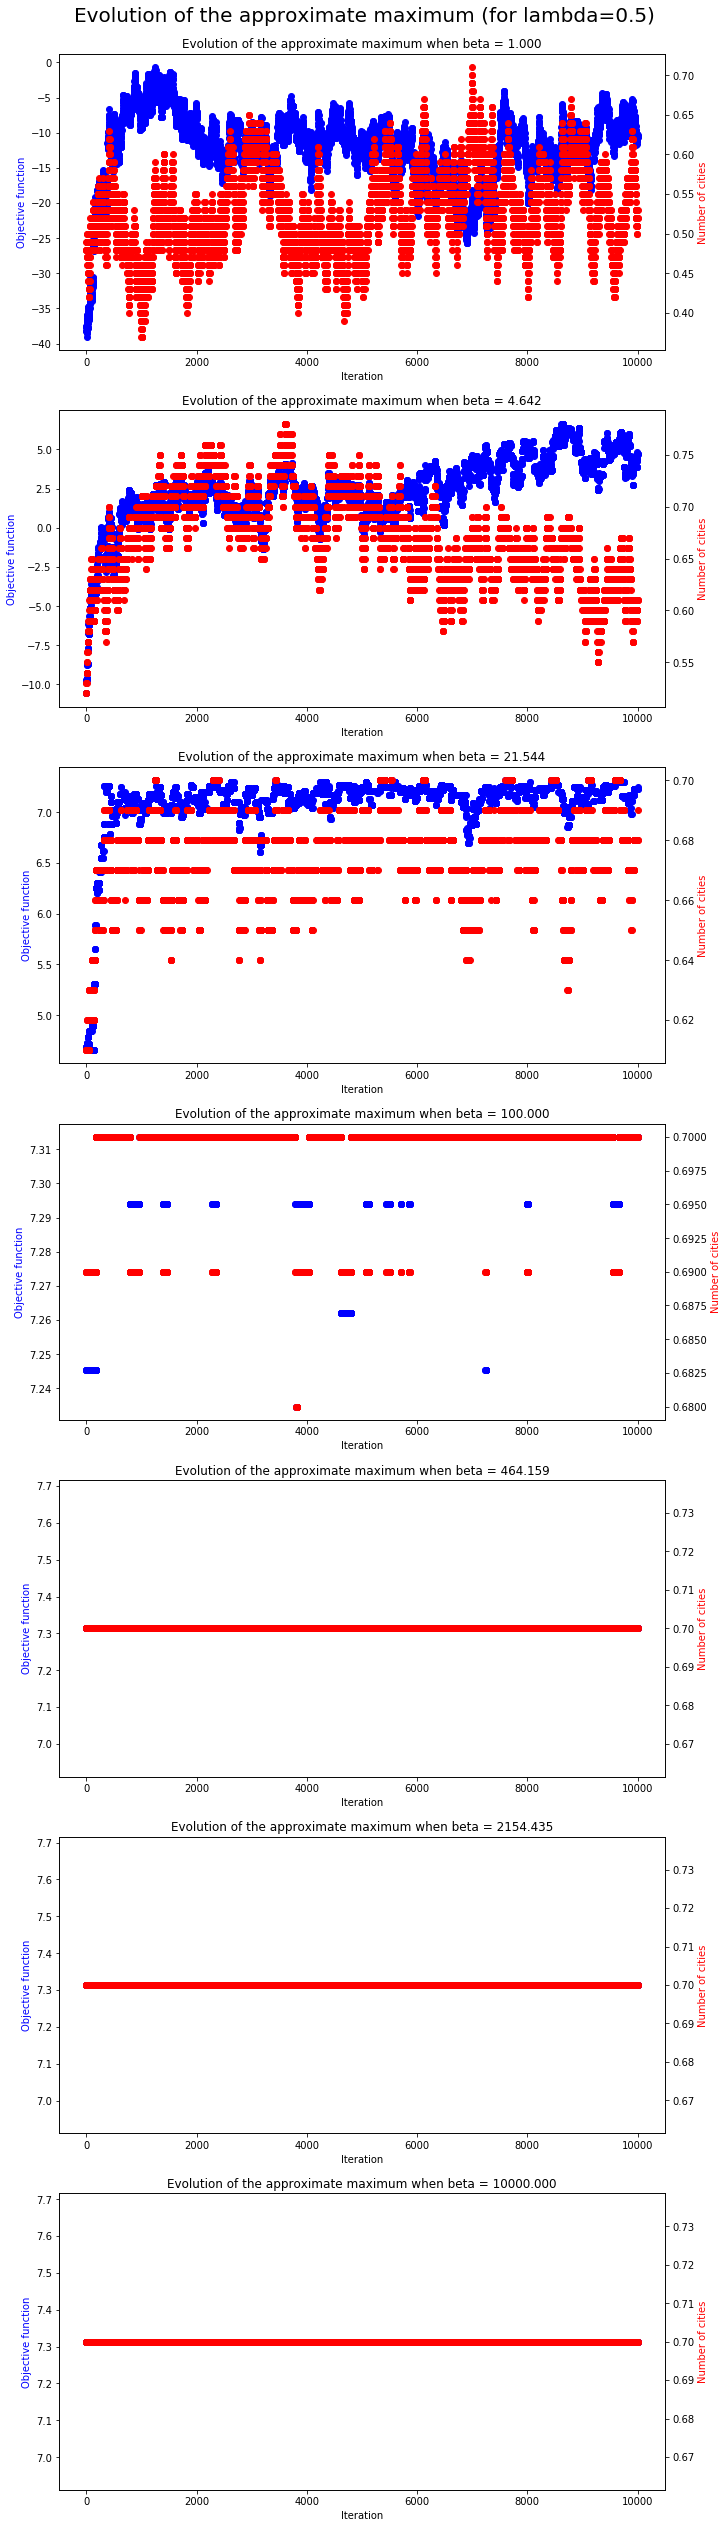

In [145]:
data = G1()

# arbitrarily chosen parameters
lambda_ = 0.5
n_iter = 10000
starting_state = np.random.randint(0, 2, data.N)
betas = np.logspace(0, 4, 7)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

### for G2

[step 1/7] Time spent on beta = 1.000 : 7.650 sec
[step 2/7] Time spent on beta = 4.642 : 6.886 sec
[step 3/7] Time spent on beta = 21.544 : 6.998 sec
[step 4/7] Time spent on beta = 100.000 : 6.485 sec
[step 5/7] Time spent on beta = 464.159 : 7.876 sec
[step 6/7] Time spent on beta = 2154.435 : 6.921 sec
[step 7/7] Time spent on beta = 10000.000 : 8.117 sec


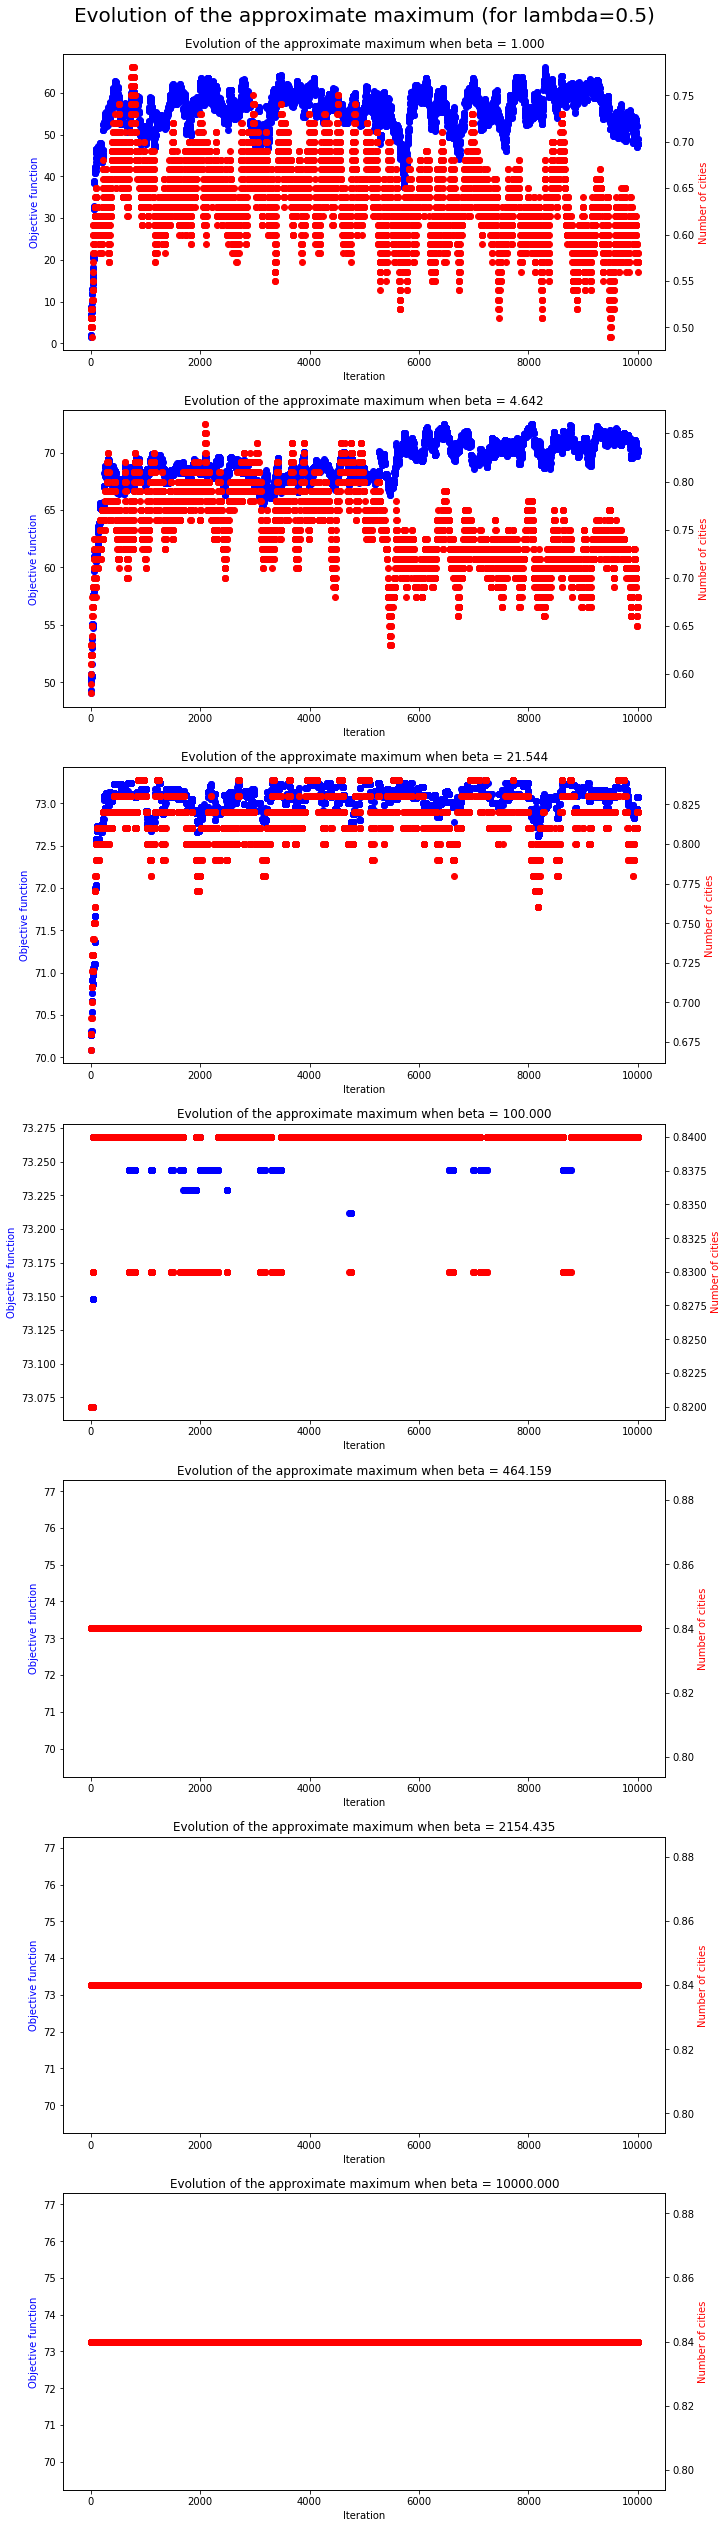

In [143]:
data = G2()

# arbitrarily chosen parameters
lambda_ = 0.5
n_iter = 10000
starting_state = np.random.randint(0, 2, data.N)
betas = np.logspace(0, 4, 7)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

## Evolution of the average approximation computed with respect to lambda  (Q2.b)

### for G1

In [ ]:
G = G1 
lambdas = np.linspace(0, 1, 10)
betas = np.logspace(0, 4, 7)
n_iter = 10000
nb_instances = 5
plot_avg_lambda(G, lambdas, betas, n_iter, nb_instances, verbose=False)

### for G2

In [ ]:
G = G2
lambdas = np.linspace(0, 1, 10)
betas = np.logspace(0, 4, 7)
n_iter = 10000
nb_instances = 5
plot_avg_lambda(G, lambdas, betas, n_iter, nb_instances, verbose=False)

## Convergence of the average approximation computed for different number of iterations at beta fixed

In [140]:
def evol_n_iter():
    G = G1 
    lambda_ = 0.5
    betas = np.logspace(0, 3, 7)
    n_iter_range = range(200, 20000, 2000)
#     n_iter_range = [200, 300]
    obj_range = []
    size_range = []
    for i, n_iter in enumerate(n_iter_range):
        avg_obj, avg_size = avg(G, betas, lambda_, n_iter, 2, verbose=False)
        obj_range.append(avg_obj)
        size_range.append(avg_size)
        
        print("[n_iter {}/{}]".format(i + 1, len(n_iter_range)))

    fig, ax = plt.subplots()
    ax.plot(n_iter_range, obj_range, color='blue', marker='o', ls=':')
    ax2 = ax.twinx()
    ax2.plot(n_iter_range, size_range, color='red', marker='o', ls=':')
    
    ax.set_title("Evolution of the approximate maximum with respect to"
                 + "\n the number of iteration per Metropolis-Hastings algorithm.", fontsize=16)
    ax.set_xlabel("Number of steps per Metropolis-Hastings algorithm", fontsize=14)
    ax.set_ylabel("Maximum objectif function", color='blue', fontsize=14)
    ax2.set_ylabel("Optimal number of cities", color='red', fontsize=14)
    fig.show()

In [141]:
#evol_n_iter()

## Test different ranges and number of betas

In [147]:
data = G1()
lambda_ = 0.5
n_iter = 10000
starting_state = np.random.randint(0, 2, data.N)

beta_range = [3, 4, 5]
beta_nb  = [7, 10, 15]

for b_max in beta_range:
    for b_nb in beta_nb:
        betas = np.logspace(0, 3, 7)

        avg_obj, avg_size = avg(G, betas, lambda_, n_iter, 2, verbose=False)
        print("[beta range {b_max}, beta number {b_nb}] max_obj={mo:.3f} nb cities={size}"
              .format(b_max=b_max, b_nb=b_nb, mo=avg_obj, size=avg_size))

[beta range 3, beta number 7] max_obj=5.247 nb cities=0.78
[beta range 3, beta number 10] max_obj=7.258 nb cities=0.675
[beta range 3, beta number 15] max_obj=6.435 nb cities=0.73
[beta range 4, beta number 7] max_obj=4.313 nb cities=0.79
[beta range 4, beta number 10] max_obj=9.896 nb cities=0.65
[beta range 4, beta number 15] max_obj=5.486 nb cities=0.77
[beta range 5, beta number 7] max_obj=3.026 nb cities=0.78
[beta range 5, beta number 10] max_obj=6.724 nb cities=0.785
[beta range 5, beta number 15] max_obj=7.394 nb cities=0.82


### old stuff

[step 1/5] Time spent on beta = 1.000 : 16.033 sec
[step 2/5] Time spent on beta = 10.000 : 13.490 sec
[step 3/5] Time spent on beta = 100.000 : 11.918 sec
[step 4/5] Time spent on beta = 1000.000 : 11.052 sec
[step 5/5] Time spent on beta = 10000.000 : 10.878 sec


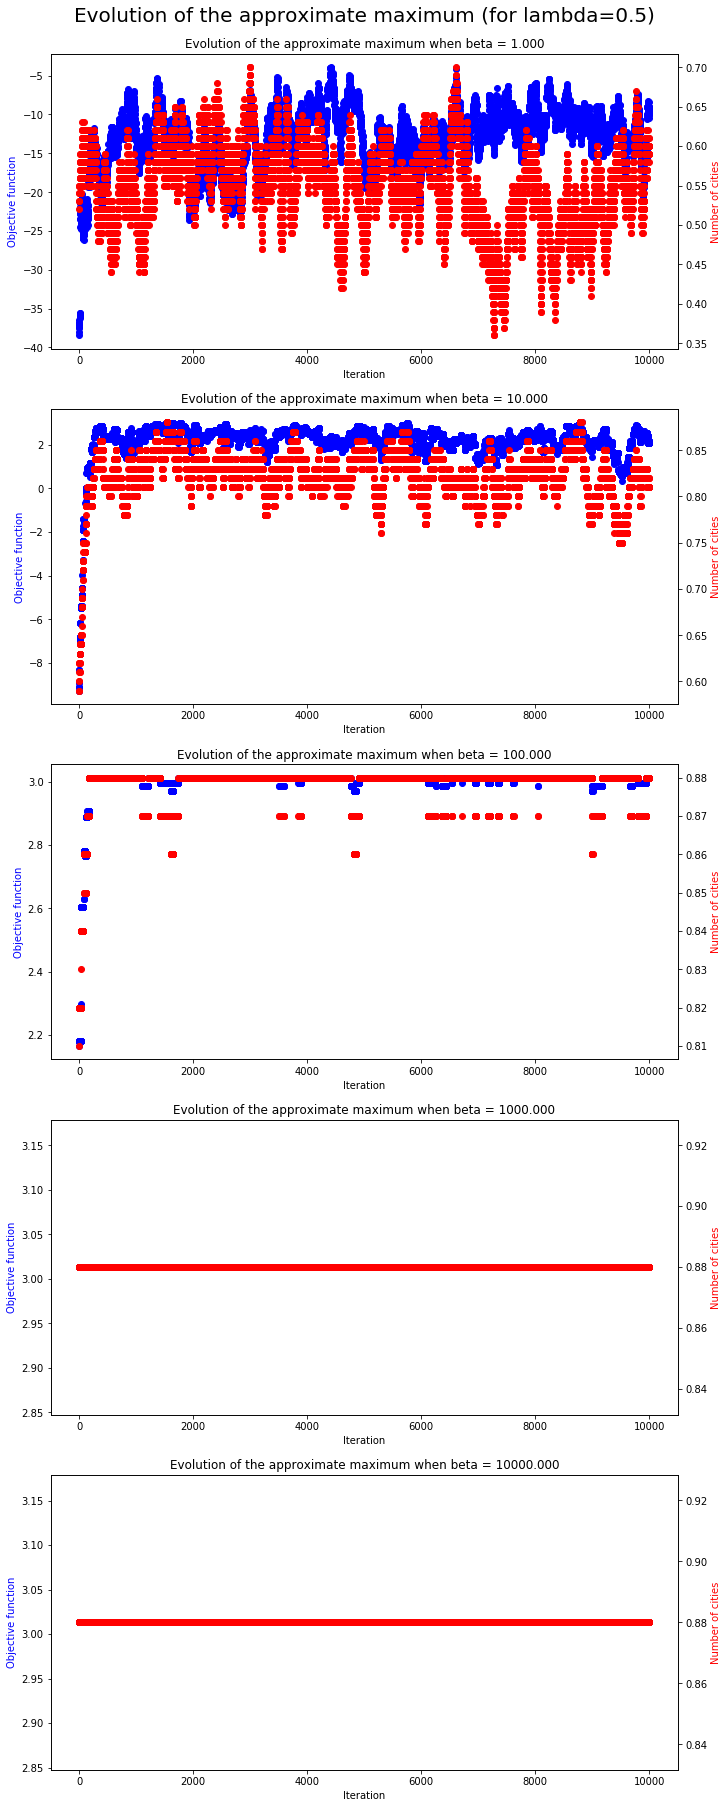

In [130]:
betas = np.logspace(0, 4, 5)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/3] Time spent on beta = 1.000 : 13.239 sec
[step 2/3] Time spent on beta = 100.000 : 15.014 sec
[step 3/3] Time spent on beta = 10000.000 : 15.543 sec


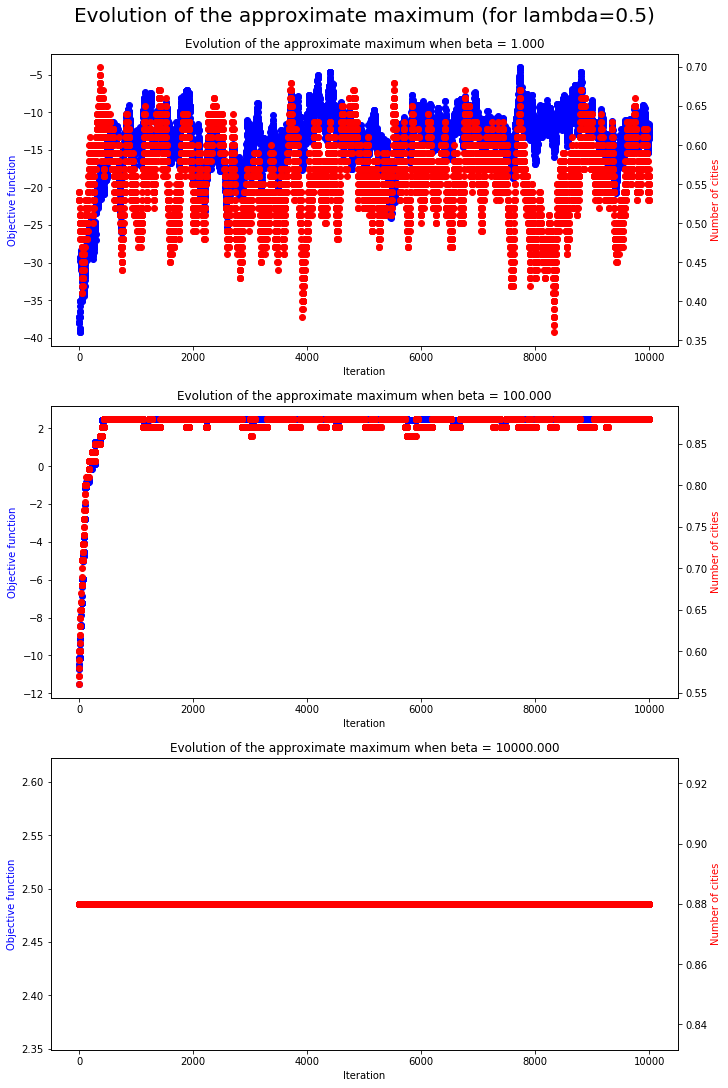

In [131]:
betas = np.logspace(0, 4, 3)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/3] Time spent on beta = 1.000 : 13.239 sec
[step 2/3] Time spent on beta = 100.000 : 15.014 sec
[step 3/3] Time spent on beta = 10000.000 : 15.543 sec


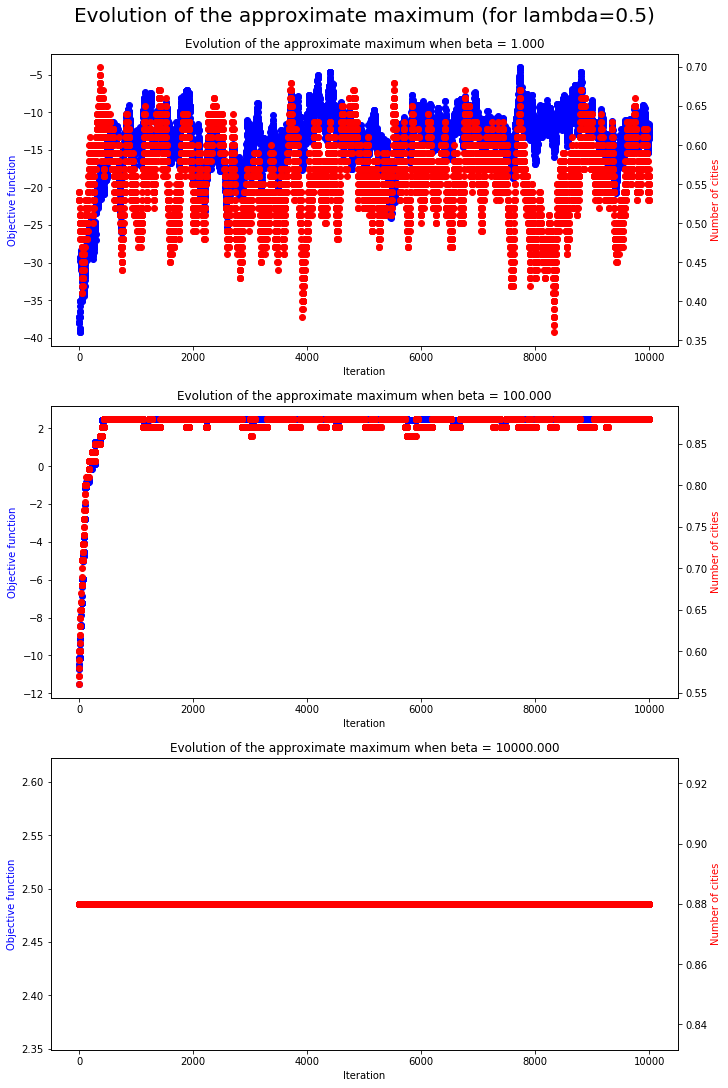

In [131]:
betas = np.logspace(0, 4, 3)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/7] Time spent on beta = 1.000 : 10.468 sec
[step 2/7] Time spent on beta = 4.642 : 10.848 sec
[step 3/7] Time spent on beta = 21.544 : 11.568 sec
[step 4/7] Time spent on beta = 100.000 : 11.024 sec
[step 5/7] Time spent on beta = 464.159 : 10.577 sec
[step 6/7] Time spent on beta = 2154.435 : 10.615 sec
[step 7/7] Time spent on beta = 10000.000 : 11.190 sec


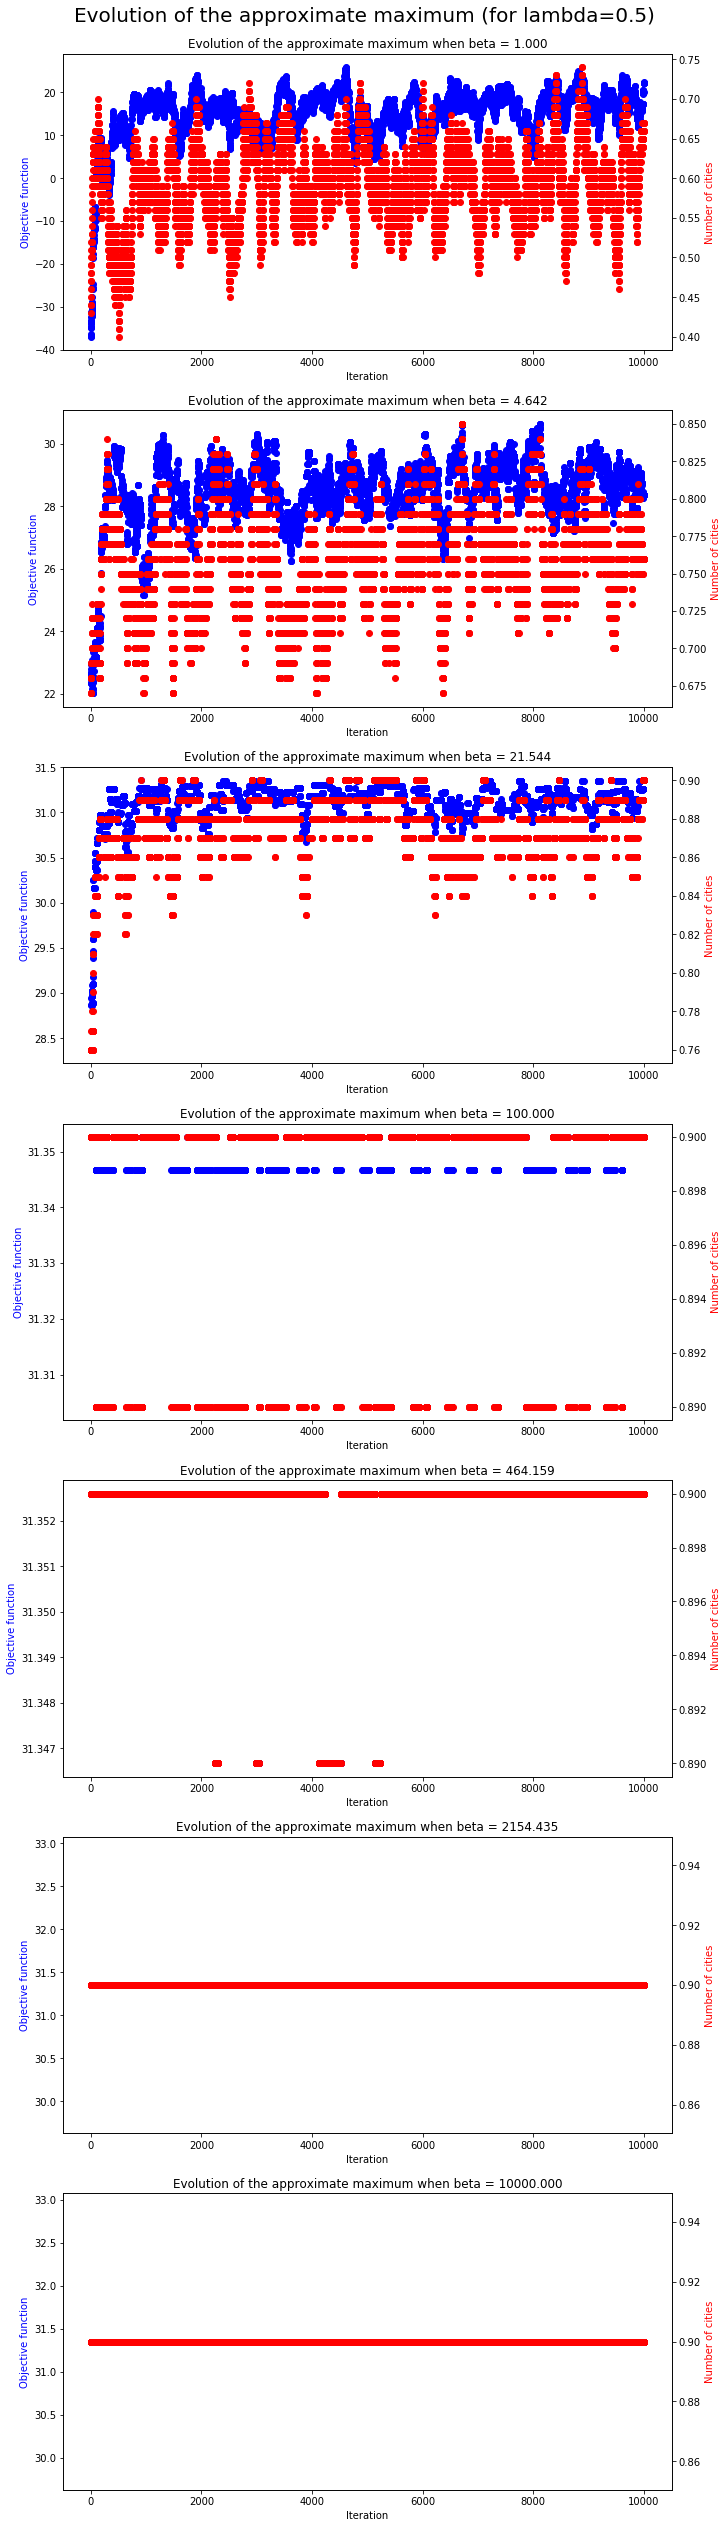

In [133]:
betas = np.logspace(0, 4, 7)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)

[step 1/10] Time spent on beta = 1.000 : 14.545 sec
[step 2/10] Time spent on beta = 2.154 : 18.132 sec
[step 3/10] Time spent on beta = 4.642 : 13.170 sec
[step 4/10] Time spent on beta = 10.000 : 12.954 sec
[step 5/10] Time spent on beta = 21.544 : 10.714 sec
[step 6/10] Time spent on beta = 46.416 : 12.698 sec
[step 7/10] Time spent on beta = 100.000 : 11.594 sec
[step 8/10] Time spent on beta = 215.443 : 10.677 sec
[step 9/10] Time spent on beta = 464.159 : 11.203 sec
[step 10/10] Time spent on beta = 1000.000 : 12.471 sec


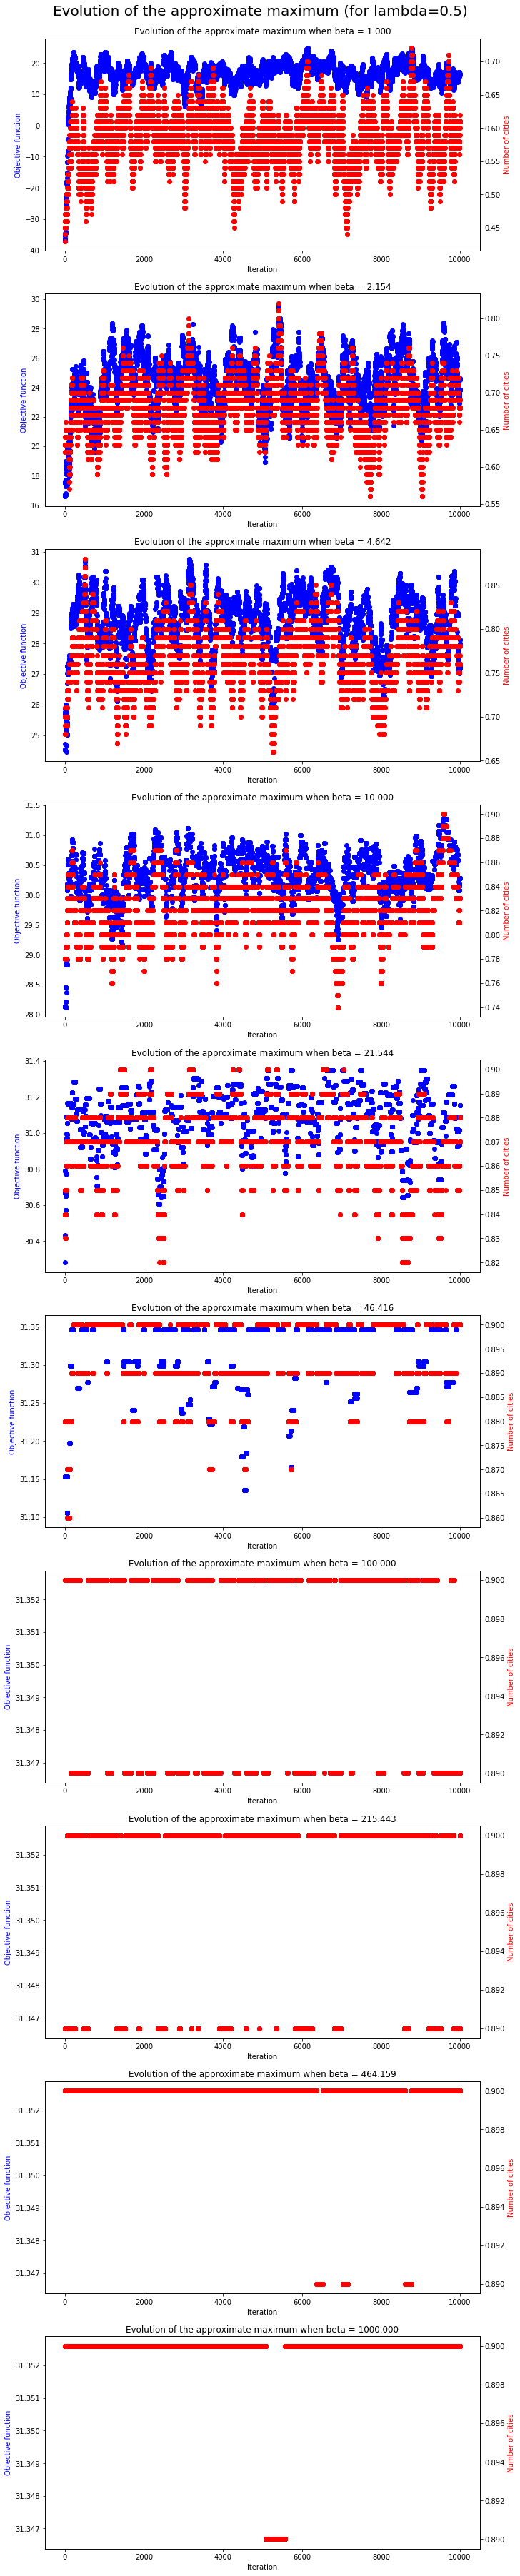

In [134]:
betas = np.logspace(0, 3, 10)

S_approx = simulated_annealing(starting_state, betas, n_iter, lambda_, data, verbose=True, plot=True)